# Introduction


The World Happiness Report is an important survey on global happiness. It's widely used by governments and organizations to shape policies. Experts from various fields explain how well-being measurements track national progress. The report reviews current happiness levels worldwide and reveals how happiness varies between individuals and nations.

<font color = 'blue'>
Content:
    
1. [Load and Check Data](#1)
2. [Varible Description](#2)
    * [Categorical Variable Analysis](#3)
    * [Numerical Variable Analysis](#4)
4. [Basic Data Analysis](#5)
6. [Missing Value](#6)
    * [Find Missing Value](#7)
    * [Fill Missing Value](#8)
7. [Visualization](#9)
    * [Correlation Between Features](#10)
    * [Ladder Score Outliers by Regional indicator](#16)
    * [Ladder Score for Countries in Map View](#11)
    * [Scatter Plots of the Features with High Values in the Correlation Map](#17)
    * [Healthy life expectancy - Log GDP per capita](#12)
    * [Social support - Freedom to make life choices](#13)
    * [Perceptions of corruption - Ladder score](#14)
    * [Log GDP per capita - Ladder score](#15)

In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#import seaborn, matpltlib.pyplot, Counter, warnings 

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter 

from sklearn.preprocessing import LabelEncoder

import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv


<a id = "1"></a><br>
# Load and Check Data


In [29]:
df1 = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv")
df2 = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv", encoding = 'unicode_escape')

In [138]:
df1.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [31]:
df2.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

df2 has a year column while df1 does not, so df1 is a data showing only the data of the year 2024. This analysis will continue using df1 so df1 will named as df.

In [32]:
df = df1

In [33]:
df.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [34]:
df.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


<a id = "2"></a><br>
# Variable Description
1. Contry name: Name of the country.
2. Regional indicator: Region of country.
3. Ladder Score: The happiniess score of each country between 0 and 10.
4. upperwhisker: Upper bound of happiniess score.
5. lowerwhisker: Lower bound of happiniess score.
6. Log GDP per capita: The natural logarithm of GDP per capita is a useful transformation for making data more manageable and suitable for analysis.
7. Social support: The national average of binary responses(either 0 or 1 representing No/Yes) to the question about having relatives or friends to count on in times of trouble.
8. Health life expectancy: The average number of years a newborn infant would live in good health.
9. Freedom to make life choices: Average of responses to the question about whether they have a say in the choices that affect their own lives.
10. The residual of regressing the national average of responses to the question about donating money to charity on GDP per capita.
11. Perceptions of corruption: The average survey results on how much people think there is corruption in the government and businesses at the national level.
12. Dystopia + residual: Dystopia is a fictional country with the world's least-happy people, used as a benchmark. The dystopia + residual score combines the Dystopia score and the unexplained residual for each country.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


* float64(10) : Ladder score, upperwhisker, lowerwhisker, Log GDP per capita', 'Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Dystopia + residual
* object(2) : Country name, Regional indicator

<a id = "3"></a><br>
## Categorical Variable

The data have only one categorical variable that indicating which the country belongs.

### Count of Regional indicator

The plot shows us how many countries from which region included.

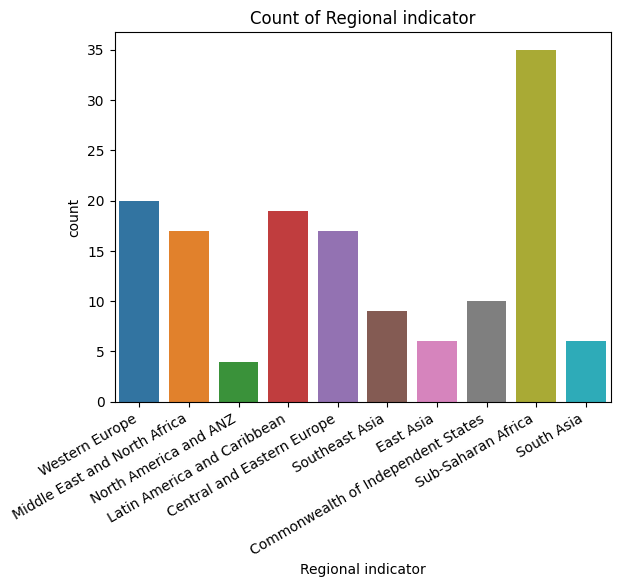


Regional indicator
Sub-Saharan Africa                    35
Western Europe                        20
Latin America and Caribbean           19
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    10
Southeast Asia                         9
East Asia                              6
South Asia                             6
North America and ANZ                  4
Name: count, dtype: int64


In [36]:

var = df['Regional indicator'] #get feature
varValue = var.value_counts() # count number of categorical variable(value/sample)
    
# visualize
sns.countplot(x ='Regional indicator', data = df)
plt.xticks(rotation= 30, ha = 'right')
plt.title('Count of Regional indicator')
plt.show()
print(f"\n{varValue}")


<a id = "4"></a><br>
## Numerical Variables

In [37]:
#there are more than one numerical values so a function defines for histogram plots
def plot_hist(var):
    plt.figure(figsize = (9,3))
    plt.hist(df[var], bins = 20)
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title(f"{var} distribution with hist")
    plt.show()

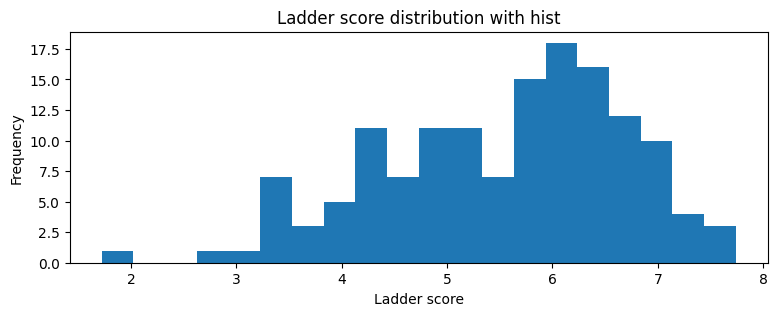

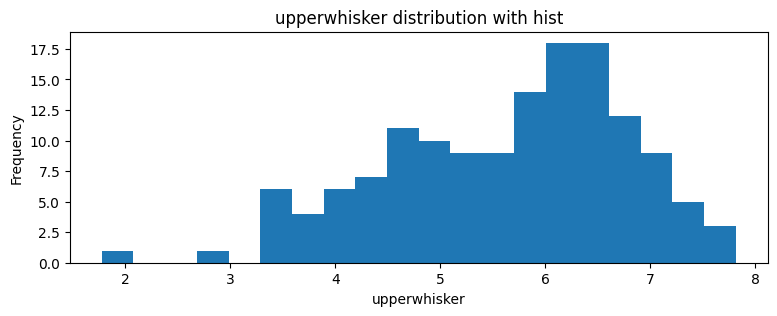

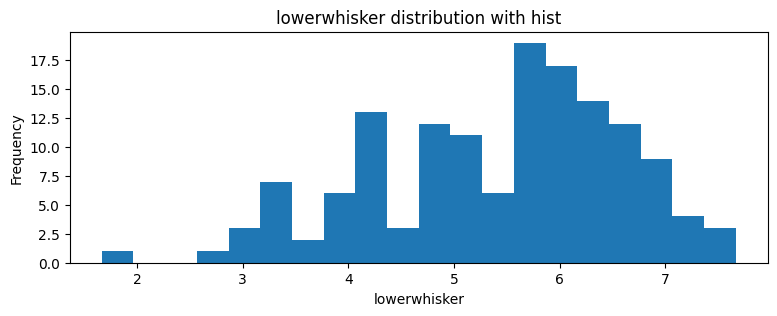

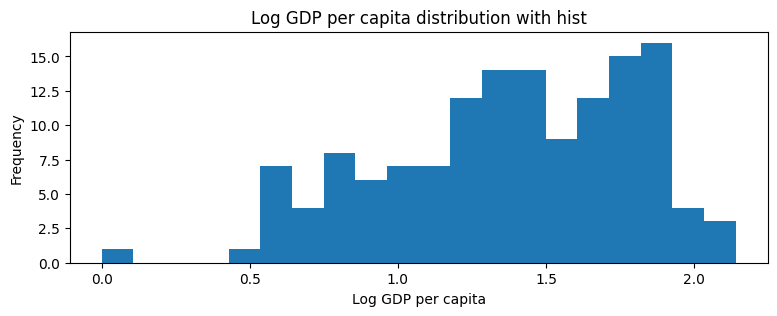

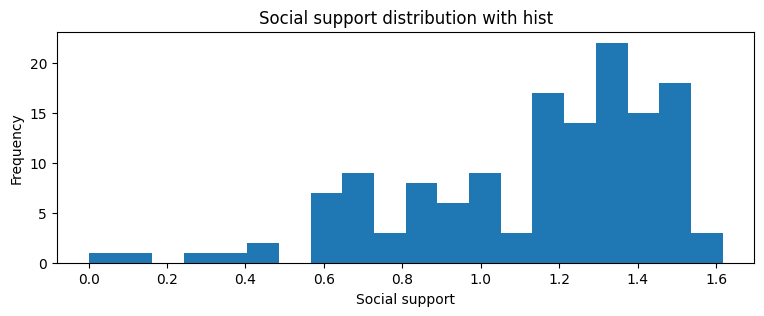

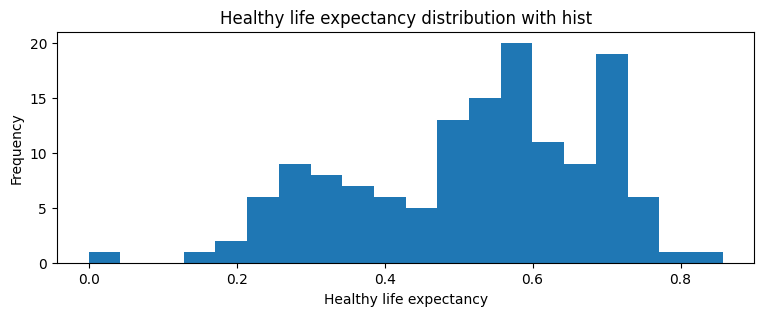

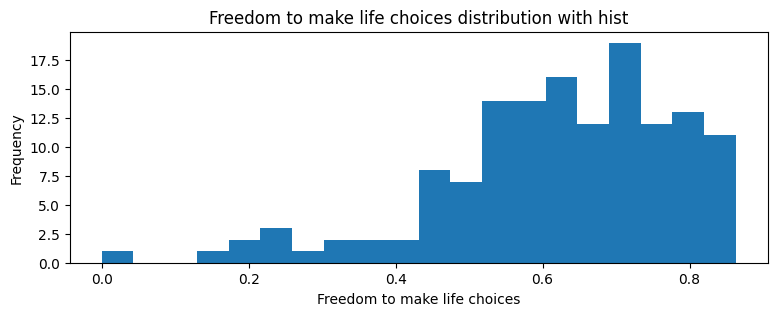

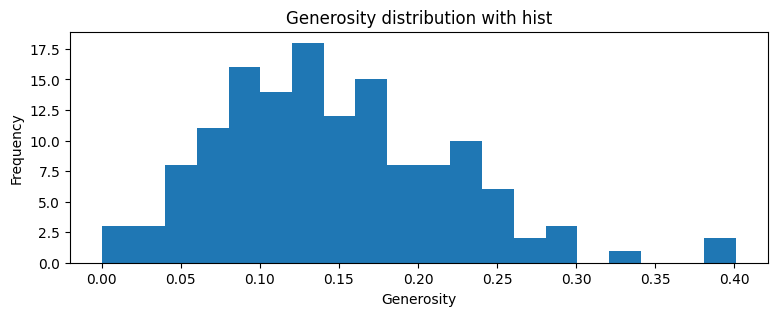

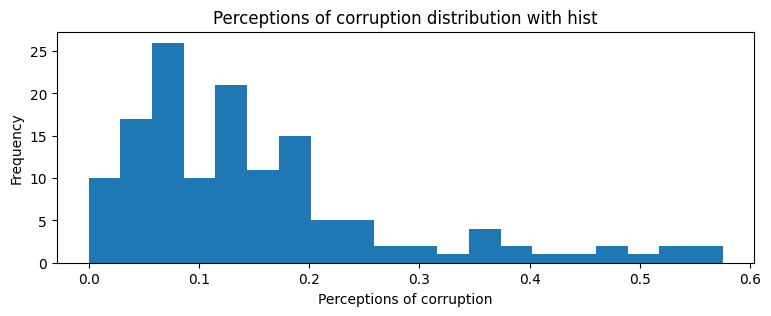

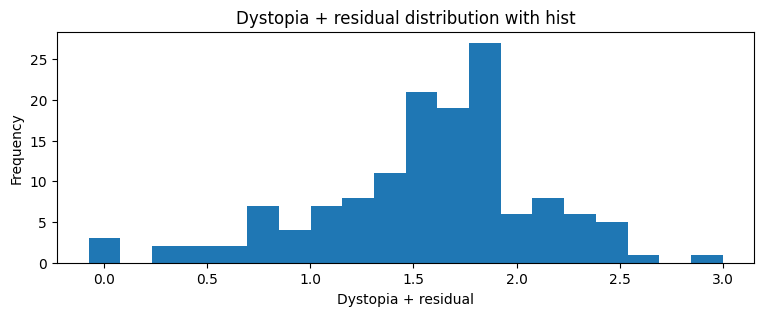

In [38]:
regional_avg = df.groupby('Regional indicator')['Ladder score'].mean().reset_index()
regional_avg
numericVars = ['Ladder score', 'upperwhisker', 'lowerwhisker', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Dystopia + residual']

for i in numericVars:
    plot_hist(i)

<a id = "5"></a><br>
# Basic Data Analysis 
* Ladder score - Regional indicator

In [39]:
#average ladder score of regional indicator
df.groupby('Regional indicator')['Ladder score'].mean().reset_index()

,Regional indicator,Ladder score
0,Central and Eastern Europe,6.170941
1,Commonwealth of Independent States,5.538500
2,East Asia,5.934333
3,Latin America and Caribbean,6.143368
4,Middle East and North Africa,5.199941
5,North America and ANZ,6.927750
6,South Asia,3.895667
7,Southeast Asia,5.551889
8,Sub-Saharan Africa,4.329686
9,Western Europe,6.841650


<a id = "6"></a><br>
# Missing Value
* Find Missing Value
* Fill Missing Value

In [40]:
df_len = len(df)
df.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


<a id = "7"></a><br>
## Find Missing Value

In [41]:
#columns have missing values
df.columns[df.isnull().any()]

Index(['Log GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [42]:
df.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64

There are 3 missing values for each of columns Log GDP per capita, Social support, Healthy life expectancy, Freedom to, make life choices, Generosity, Perceptions of corruption, Dystopia + residual.

<a id = "8"></a><br>
## Fill Missing Values

In [43]:
df[df.isnull().any(axis=1)]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
61,Bahrain,Middle East and North Africa,5.959,6.153,5.766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,Tajikistan,Commonwealth of Independent States,5.281,5.361,5.201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,State of Palestine,Middle East and North Africa,4.879,5.006,4.753,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Missing values can be filled using the mean of the column
* There are no non-numeric columns have missing value


In [44]:
#Select numeric colors to avoid error
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()), axis=0)

In [45]:
#check is there any missing values
df[df.isnull().any(axis=1)]

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual


In [139]:
#keep as df1 to avoid losing the original dataframe
df1 = df

<a id = "9"></a><br>
# Visualization

<a id = "10"></a><br>
## Correlation Between Features

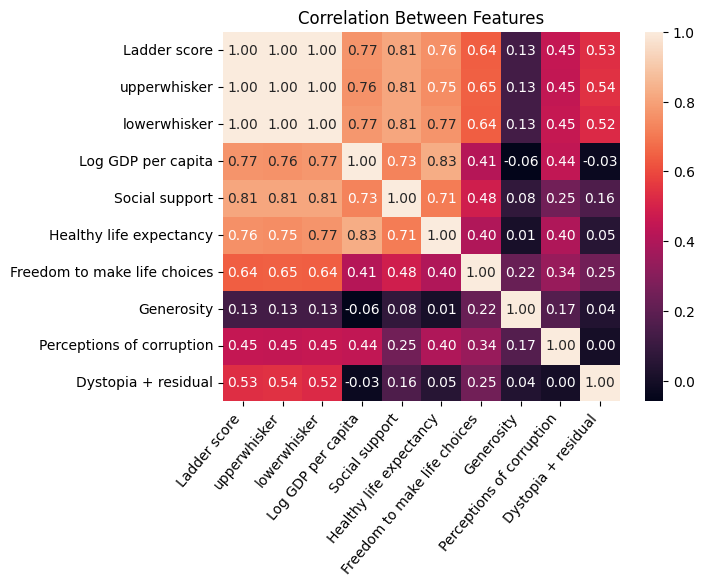

In [46]:
sns.heatmap(df[numeric_cols].corr(), annot = True, fmt = ".2f")
plt.title('Correlation Between Features')
plt.xticks(rotation= 50, ha = 'right')
plt.show()

* It is obvious Ladder score, upperwhisker, and lowerwhisker have correlation because upperwhisker and loweerwhisker are borders of Ladder score.
* Some features have a high correlation, their scatter plots will be drawn later

<a id = "16"></a><br>
## Ladder Score Outliers by Regional indicator

<Axes: ylabel='Ladder score'>

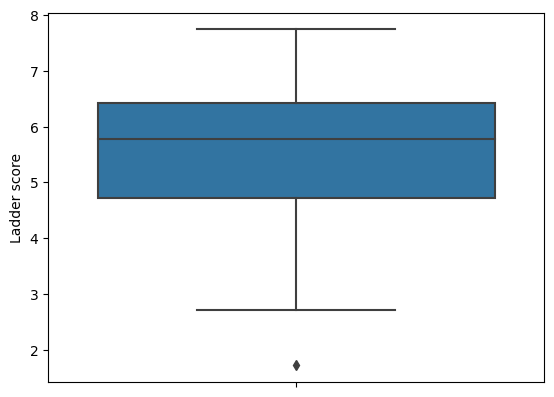

In [165]:
sns.boxplot(y=df['Ladder score'])

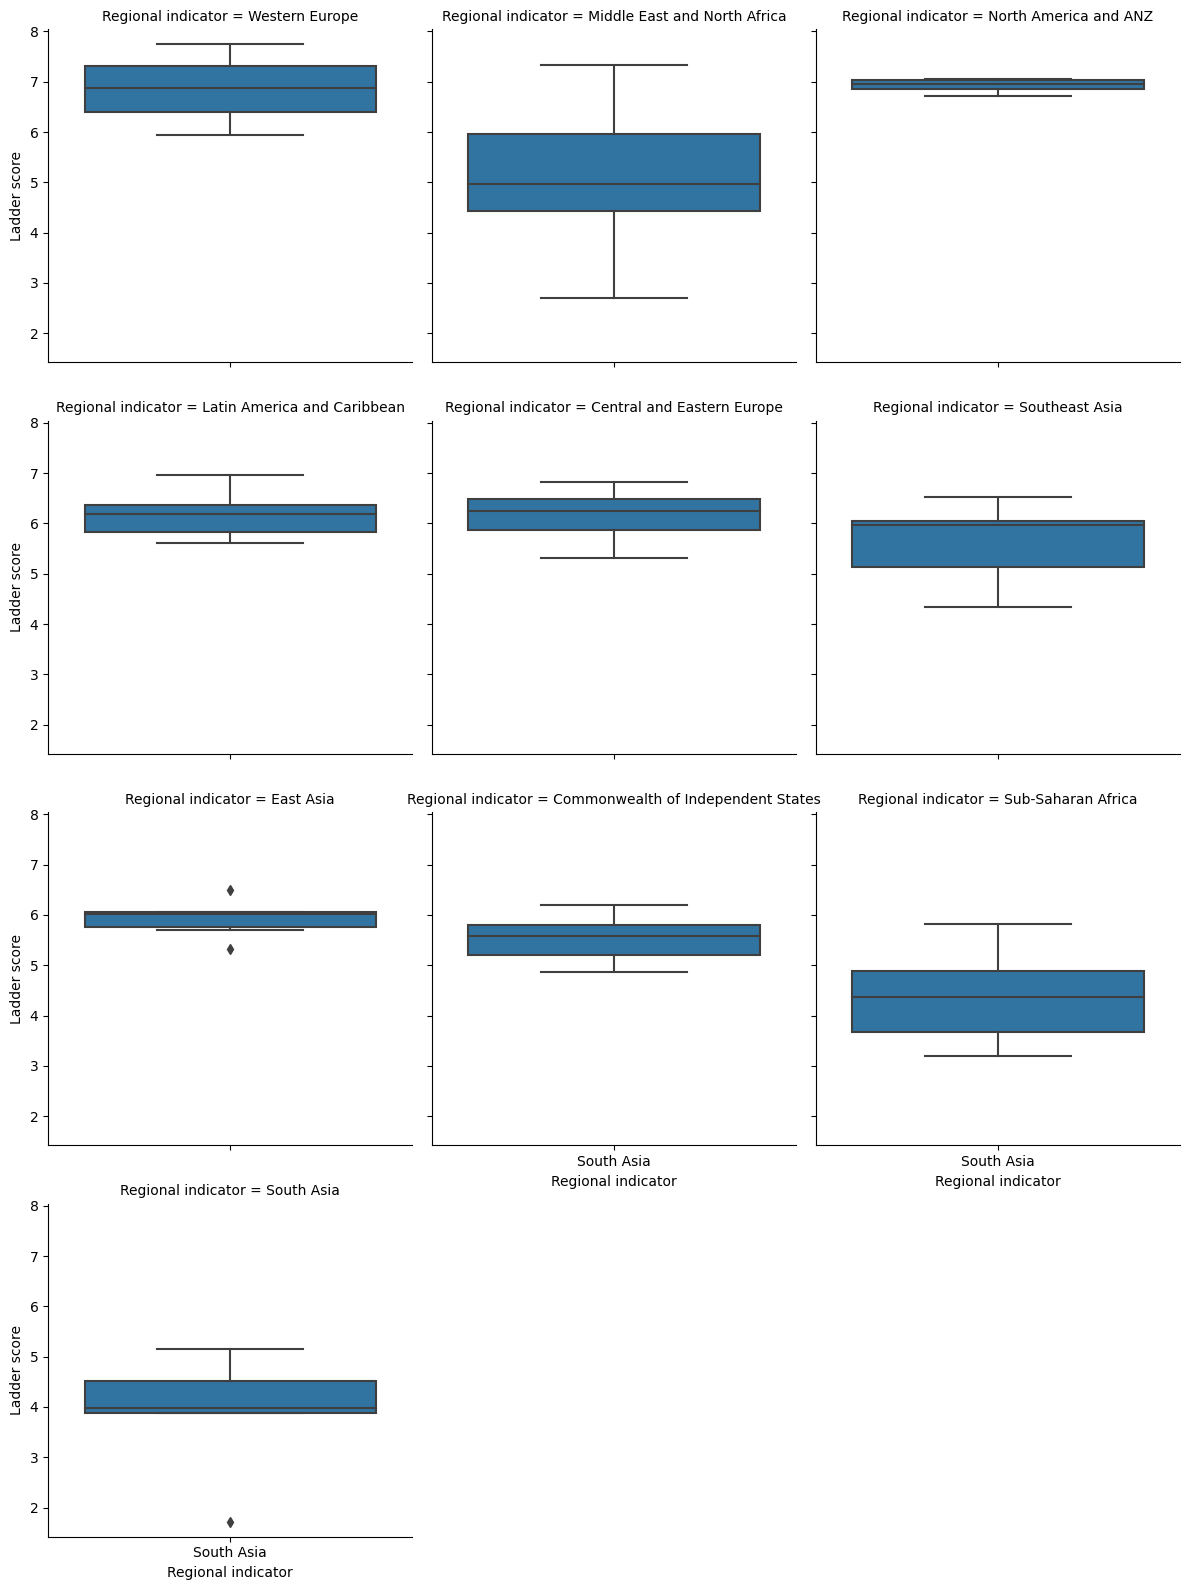

In [161]:
g = sns.FacetGrid(df, col="Regional indicator", col_wrap=3, height=4)
g.map(sns.boxplot, "Regional indicator", "Ladder score")
plt.show()

In [48]:
df['Regional indicator'].astype('category')

0                    Western Europe
1                    Western Europe
2                    Western Europe
3                    Western Europe
4      Middle East and North Africa
                   ...             
138              Sub-Saharan Africa
139              Sub-Saharan Africa
140              Sub-Saharan Africa
141    Middle East and North Africa
142                      South Asia
Name: Regional indicator, Length: 143, dtype: category
Categories (10, object): ['Central and Eastern Europe', 'Commonwealth of Independent States', 'East Asia', 'Latin America and Caribbean', ..., 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe']

In [49]:
df['Regional indicator'].unique()

array(['Western Europe', 'Middle East and North Africa',
       'North America and ANZ', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'Southeast Asia', 'East Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

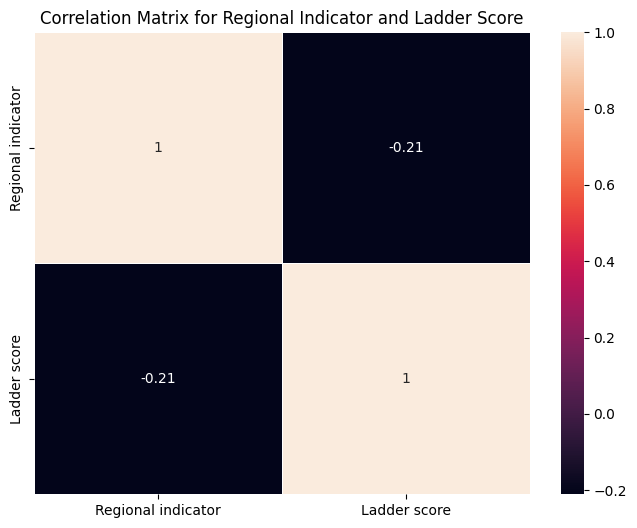

In [50]:
#making religions int
label_encoder = LabelEncoder()
df['Regional indicator'] = label_encoder.fit_transform(df['Regional indicator'])

df[['Regional indicator', 'Ladder score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Regional indicator', 'Ladder score']].corr(), annot=True, linewidths=0.5)
plt.title('Correlation Matrix for Regional Indicator and Ladder Score')
plt.show()

After performing the necessary operations,these numeric values are transformeded back to the original categorical values using inverse_transform.

In [51]:
df.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,9,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,9,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,9,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,9,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,4,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [52]:
df['Regional indicator'] = label_encoder.inverse_transform(df['Regional indicator'])
df.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


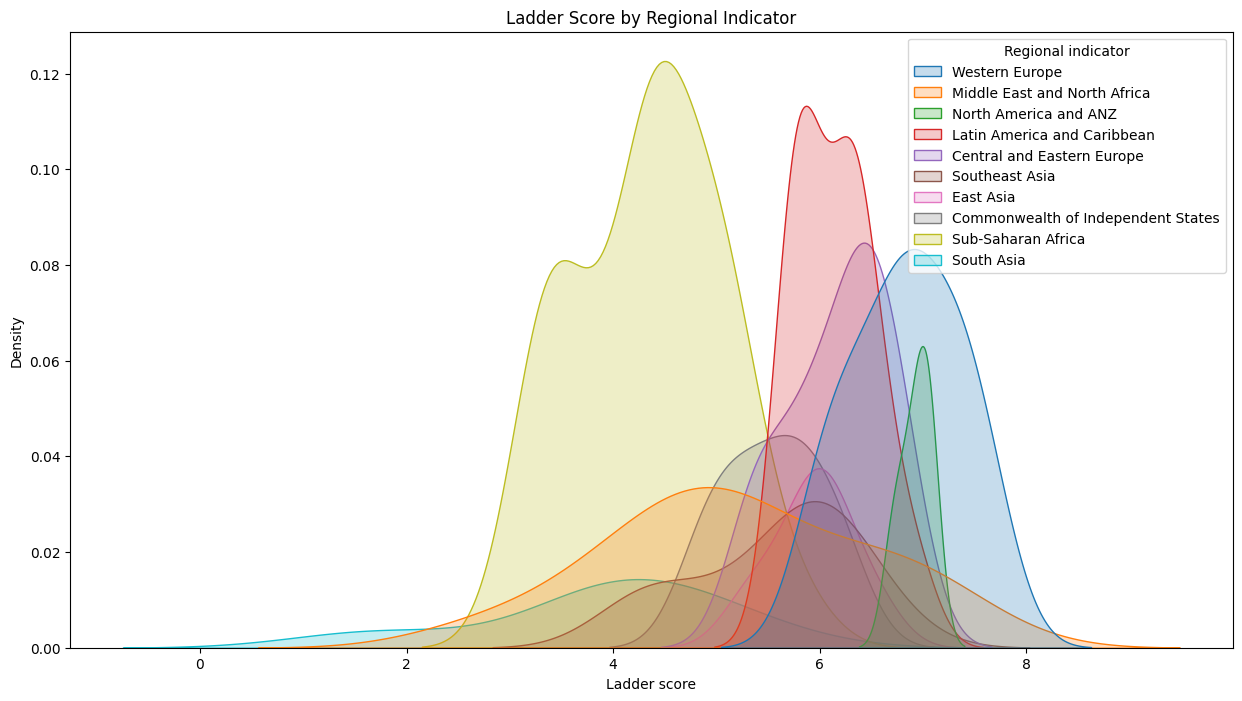

In [136]:
plt.figure(figsize = (15,8))
sns.kdeplot(x=df['Ladder score'], hue = df['Regional indicator'], shade = True  )
plt.title('Ladder Score by Regional Indicator')
plt.show()

According to the chart, we can say that Laddr score is low in the African region and South Asia, and that Ladder score is high in Western Europe.

<a id = "11"></a><br>
## Ladder Score for Countries in Map View

Some countries named different so trying fix  the values manually

In [106]:
#merge dataframes to match country names
world = world.rename(columns={'name': 'Country name'})
merged = world.set_index('Country name').join(df.set_index('Country name'), how='outer')

#checking for non-matching country names
print("\nEşleşmeyen ülke isimleri:")
print(merged[merged['Ladder score'].isna() | merged['geometry'].isna()].index.tolist())



Eşleşmeyen ülke isimleri:
['Angola', 'Antarctica', 'Bahamas', 'Bahrain', 'Belarus', 'Belize', 'Bhutan', 'Bosnia and Herz.', 'Bosnia and Herzegovina', 'Brunei', 'Burundi', 'Central African Rep.', 'Comoros', 'Congo', 'Congo (Brazzaville)', 'Cuba', 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Falkland Islands', 'Fiji', 'French Southern and Antarctic Lands', 'Greenland', 'Guinea Bissau', 'Guyana', 'Haiti', 'Hong Kong S.A.R. of China', 'Malta', 'Mauritius', 'N. Cyprus', 'New Caledonia', 'North Korea', 'Oman', 'Palestine', 'Papua New Guinea', 'Puerto Rico', 'Qatar', 'Rwanda', 'S. Sudan', 'Singapore', 'Solomon Is.', 'Somalia', 'Somaliland', 'State of Palestine', 'Sudan', 'Suriname', 'Swaziland', 'Syria', 'Taiwan', 'Taiwan Province of China', 'Timor-Leste', 'Trinidad and Tobago', 'Turkmenistan', 'United States', 'United States of America', 'Vanuatu', 'Western Sahara']


In [166]:
world = world.rename(columns={'name': 'Country name'})
merged = world.set_index('Country name').join(df.set_index('Country name'), how='outer')

country_map= {
    "Ivory Coast": "Côte d'Ivoire",
    "Congo (Kinshasa)": "Dem. Rep. Congo",
    "Dominican Republic": "Dominican Rep.",
    "Equatorial Guinea": "Eq. Guinea",
    "French Southern and Antarctic Lands": "Fr. S. Antarctic Lands",
    "Falkland Islands": "Falkland Is.",
    "Guinea Bissau": "Guinea-Bissau",
    "Hong Kong": "Hong Kong S.A.R. of China",
    "Côte d'Ivoire": "Ivory Coast",
    "Papua New Guinea": "Papua New Guinea",
    "Puerto Rico": "Puerto Rico",
    "Taiwan": "Taiwan Province of China",
    "Turkey": "Turkiye",
    "United States of America": "United States",
    "Vanuatu": "Vanuatu",
    "Western Sahara": "W. Sahara",
    "Swaziland": "eSwatini"
}


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world['name'].replace(country_map, inplace=True)                                                              

Some countries still have problem.

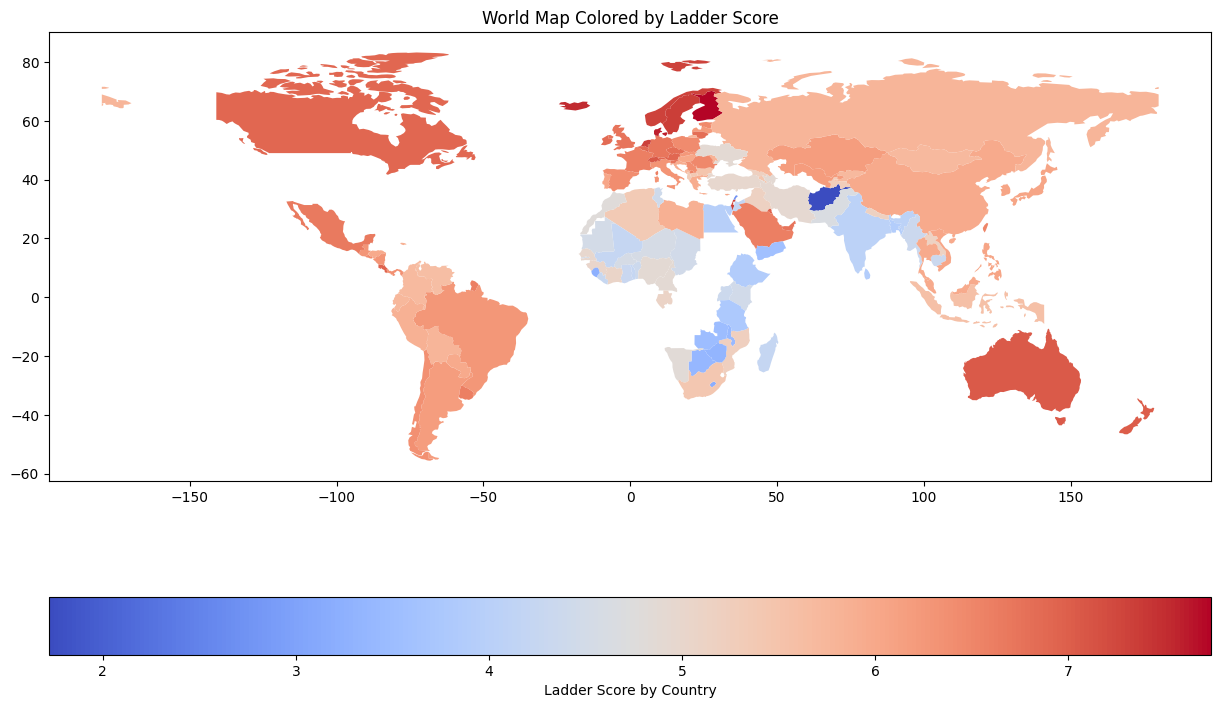

In [120]:
# Haritayı çizme
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Ladder score', ax=ax, legend=True,
            legend_kwds={'label': "Ladder Score by Country",
                         'orientation': "horizontal"},
            cmap='coolwarm')

plt.title('World Map Colored by Ladder Score')
plt.show()


<a id = "17"></a><br>
## Scatter Plots of the Features with High Values in the Correlation Map

<a id = "12"></a><br>
## Health life expectancy - Log GDP per capita

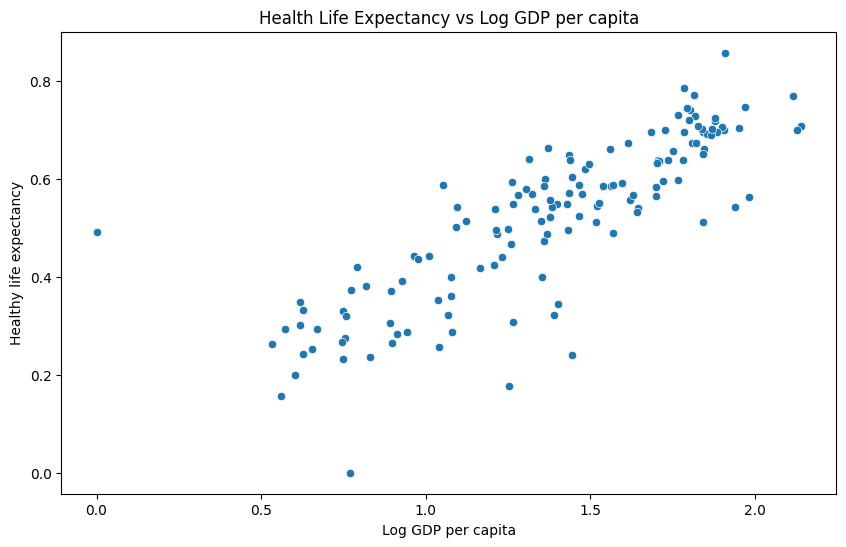

In [144]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Log GDP per capita', y='Healthy life expectancy')
plt.title('Health Life Expectancy vs Log GDP per capita')
plt.xlabel('Log GDP per capita')
plt.ylabel('Healthy life expectancy')
plt.show()


<a id = "13"></a><br>
## Social support - Freedom to make life choices

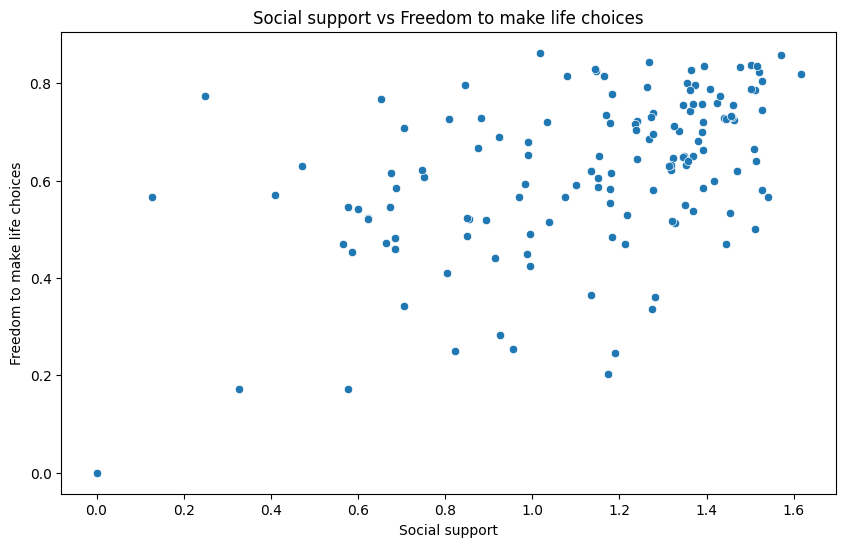

In [146]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Social support', y='Freedom to make life choices')
plt.title('Social support vs Freedom to make life choices')
plt.xlabel('Social support')
plt.ylabel('Freedom to make life choices')
plt.show()

<a id = "14"></a><br>
## Perceptions of corruption - Ladder score

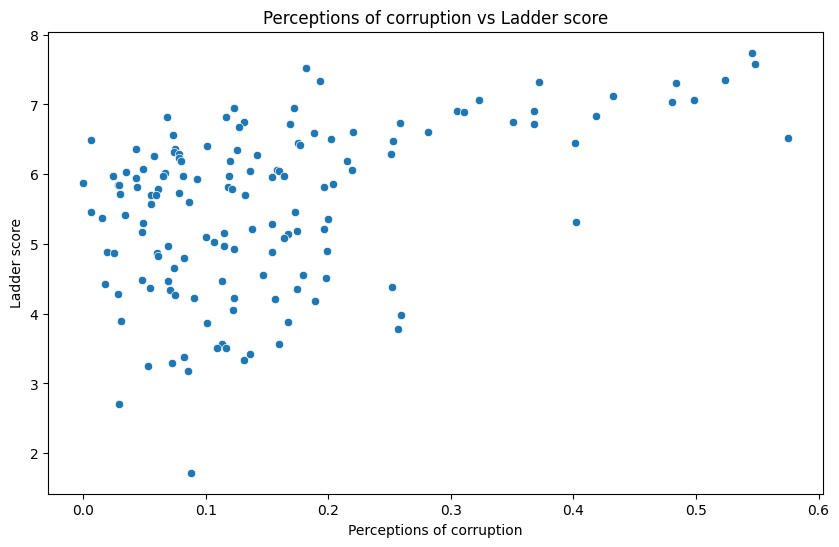

In [147]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Perceptions of corruption', y='Ladder score')
plt.title('Perceptions of corruption vs Ladder score')
plt.xlabel('Perceptions of corruption')
plt.ylabel('Ladder score')
plt.show()

<a id = "15"></a><br>
## Log GDP per capita - Ladder score

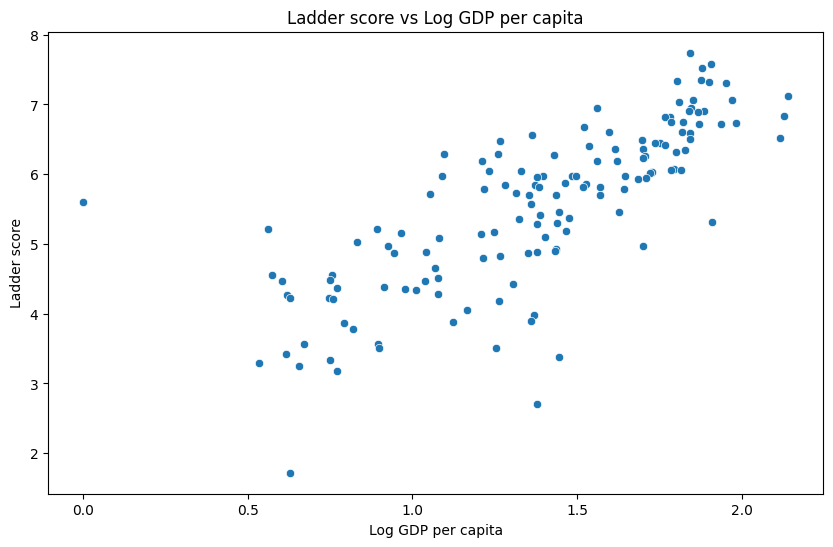

In [160]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Log GDP per capita', y='Ladder score')
plt.title('Ladder score vs Log GDP per capita')
plt.xlabel('Log GDP per capita')
plt.ylabel('Ladder score')
plt.show()
